In [1]:
import xarray as xr
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'Dark2'

DA = xr.DataArray

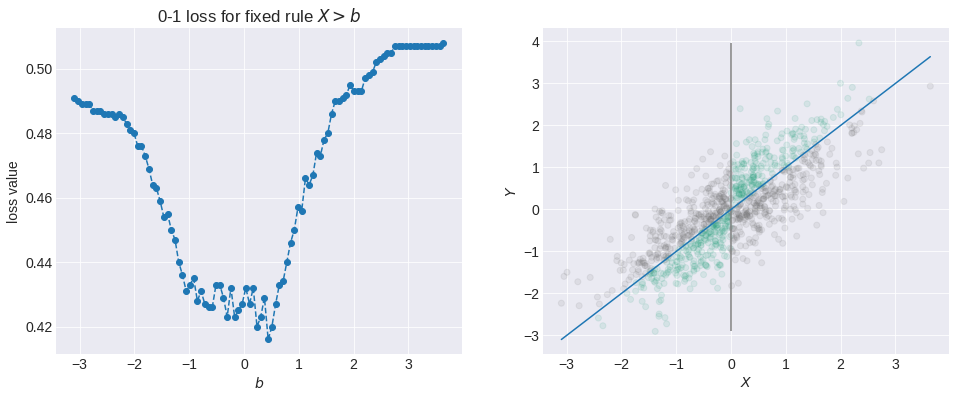

In [2]:
ρ = 0.8
μ = [0, 0]
σx = 1
σy = 1
Σ = [[     σx, ρ*σx*σy],
     [ρ*σx*σy,      σy]]
X, Y = npr.multivariate_normal(μ, Σ, size=1_000).T

# no side info
b_space = np.linspace(X.min(), X.max(), 100)
errors = [((X > Y) != (X > b)).mean() for b in b_space]
hits_at_0 = (X > Y) == (X > 0)

plt.subplot(1, 2, 1)
plt.title('0-1 loss for fixed rule $X > b$')
plt.plot(b_space, errors, 'o--')
plt.ylabel('loss value')
plt.xlabel('$b$')

plt.subplot(1, 2, 2)
plt.scatter(X, Y, alpha=0.1, c=hits_at_0)
plt.plot(*(2*[[X.min(), X.max()]]))
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.vlines(0, Y.min(), Y.max(), colors='gray')

plt.show()